In [117]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import re
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [100]:
cust_data = pd.read_csv('twm_customer.csv', sep=';')
check_data = pd.read_csv('twm_checking_acct.csv', sep=';')
saving_data = pd.read_csv('twm_savings_acct.csv', sep=';')
credit_data = pd.read_csv('twm_credit_acct.csv', sep=';')
trans_data = pd.read_csv('twm_transactions.csv', sep=';')
acc_data = pd.read_csv('twm_accounts.csv', sep=';')
checktrans_data = pd.read_csv('twm_checking_tran.csv', sep=';')

In [101]:
cust_data
#cluster by income using: age, martial_status, nbr_children, years_with_bank

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [23]:
cust1 = cust_data[['income', 'age', 'gender', 'marital_status', 'state_code']]

In [181]:
cust2 = cust_data[['income', 'age', 'years_with_bank', 'nbr_children', 'marital_status']]

scaled_cust2 = scaler.fit_transform(cust2)
columns = cust2.columns
df_cust2 = pd.DataFrame(scaled_cust2, columns=columns)

In [182]:
#new scaled and filtered data
df_cust2

,income,age,years_with_bank,nbr_children,marital_status
0,0.154185,0.184312,0.408539,0.258591,0.132149
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614
4,0.983479,0.864867,1.904514,1.165479,2.375675
...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675
743,0.164864,0.707816,0.782533,0.258591,0.132149
744,1.738064,0.393714,-1.461429,1.165479,0.132149
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149


In [24]:
def gender(x):
    if x == 'M ':
        return 1
    else:
        return 0
cust1['gender_code'] = pd.Series.apply(cust1['gender'],gender)

<ipython-input-24-bc4c3828734f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust1['gender_code'] = pd.Series.apply(cust1['gender'],gender)


In [25]:
cust1 = cust1.drop(columns='gender')

In [40]:
sc = cust1['state_code'].sort_values().unique()
sc

array(['AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NB', 'NC', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI'],
      dtype=object)

In [27]:
def regex(line):
    updated_string = re.sub("\s.", "", line)
    return updated_string
cust1['state_code'] = pd.Series.apply(cust1['state_code'],regex)

In [46]:
cust1.replace({"state_code": y}, inplace=True)

In [47]:
#cleaned and prepped data
cust1

,income,age,marital_status,state_code,gender_code
0,26150,46,2,22,1
1,6605,71,2,2,1
2,18548,38,1,2,0
3,47668,54,1,2,0
4,44554,59,4,23,0
...,...,...,...,...,...
742,14795,36,4,2,0
743,26387,56,2,23,1
744,61300,50,2,21,1
745,15100,37,2,0,0


In [41]:
sc

array(['AL', 'AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'HI', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NB', 'NC', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI'],
      dtype=object)

In [42]:
emp_list = []

In [43]:
for i, x in enumerate(sc):
    emp_list.append((x, i))

In [44]:
y = dict(emp_list)

In [52]:
scaler = StandardScaler()
scaled_cust1 = scaler.fit_transform(cust1)

In [57]:
columns=cust1.columns

In [58]:
df_cust1 = pd.DataFrame(scaled_cust1, columns=columns)

In [173]:
df_cust1

,income,age,marital_status,state_code,gender_code
0,0.154185,0.184312,0.132149,0.649738,1.127172
1,-0.726524,1.493070,0.132149,-1.198878,1.127172
2,-0.188366,-0.234490,-0.989614,-1.198878,-0.887176
3,1.123798,0.603115,-0.989614,-1.198878,-0.887176
4,0.983479,0.864867,2.375675,0.742169,-0.887176
...,...,...,...,...,...
742,-0.357478,-0.339191,2.375675,-1.198878,-0.887176
743,0.164864,0.707816,0.132149,0.742169,1.127172
744,1.738064,0.393714,0.132149,0.557307,1.127172
745,-0.343735,-0.286841,0.132149,-1.383740,-0.887176


In [59]:
X = df_cust1.drop(columns='state_code')

,income,age,marital_status,state_code,gender_code
0,0.154185,0.184312,0.132149,0.649738,1.127172
1,-0.726524,1.493070,0.132149,-1.198878,1.127172
2,-0.188366,-0.234490,-0.989614,-1.198878,-0.887176
3,1.123798,0.603115,-0.989614,-1.198878,-0.887176
4,0.983479,0.864867,2.375675,0.742169,-0.887176
...,...,...,...,...,...
742,-0.357478,-0.339191,2.375675,-1.198878,-0.887176
743,0.164864,0.707816,0.132149,0.742169,1.127172
744,1.738064,0.393714,0.132149,0.557307,1.127172
745,-0.343735,-0.286841,0.132149,-1.383740,-0.887176


In [73]:
X = df_cust1.drop(columns='state_code',)

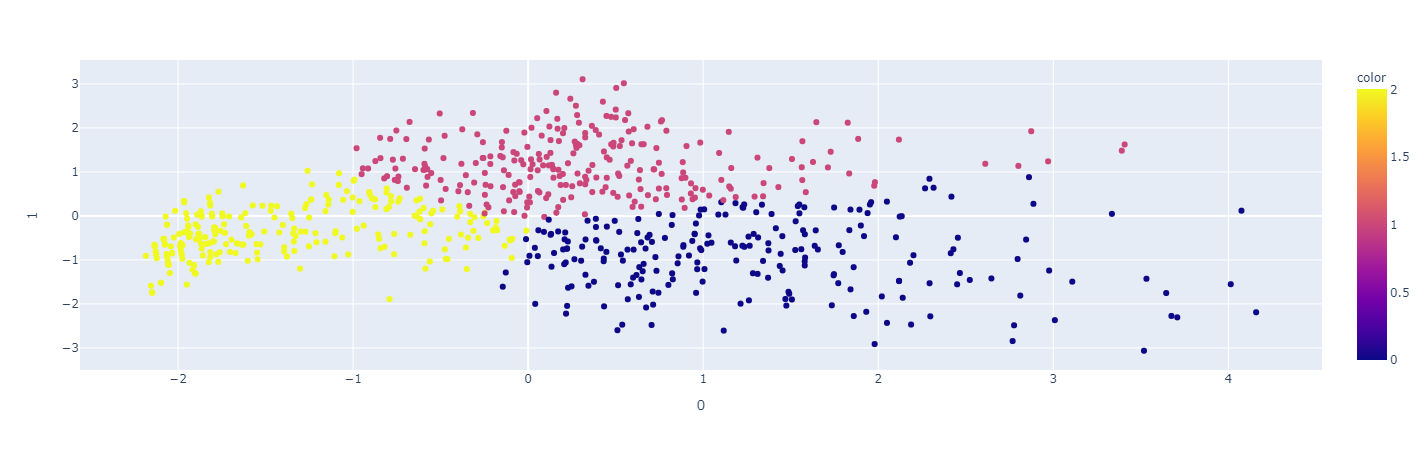

In [168]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_z)


fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

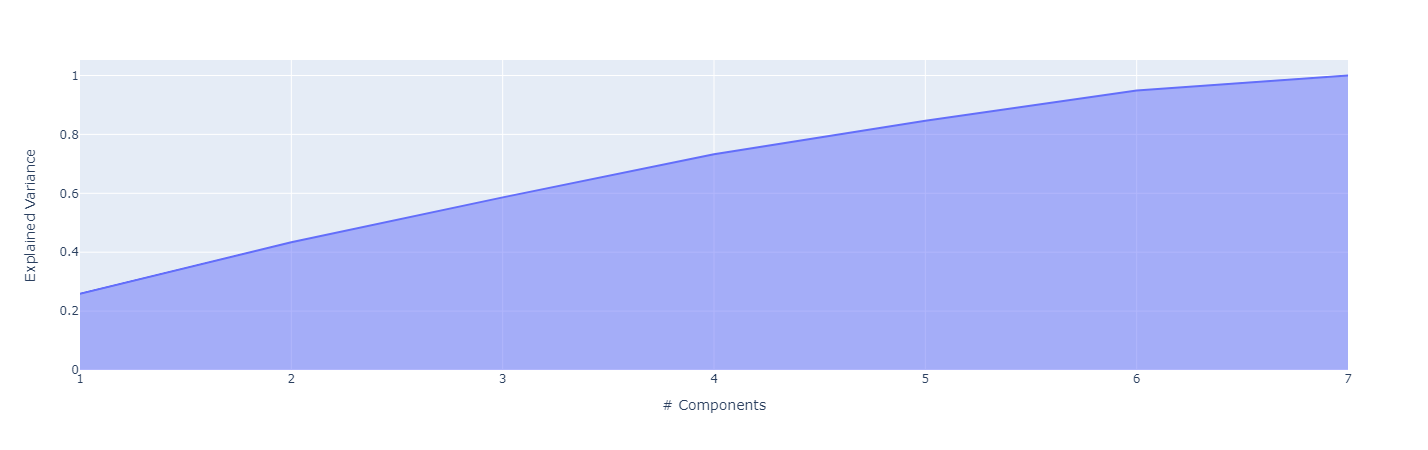

In [116]:
pca = PCA()
pca.fit(df_z)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [155]:
km = KMeans(n_clusters=3,
            n_init=3)

In [156]:
y_km = km.fit_predict(components)

In [157]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    plt.figure(figsize=(12,9))

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=25,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

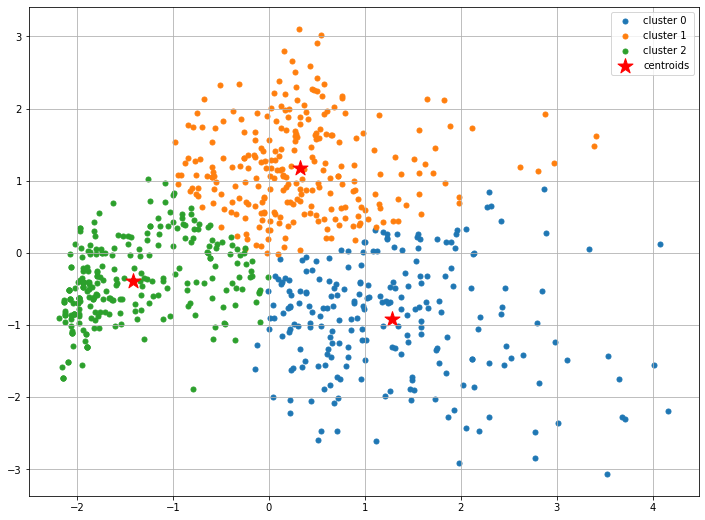

In [158]:
plot_clusters(components, y_km, plt_cluster_centers=True)

In [170]:
df_z

,0,1,2,3,4,5,6
0,0.154185,0.184312,0.132149,0.649738,1.127172,0.258591,0.408539
1,-0.726524,1.493070,0.132149,-1.198878,1.127172,-0.648298,-1.087435
2,-0.188366,-0.234490,-0.989614,-1.198878,-0.887176,-0.648298,1.530520
3,1.123798,0.603115,-0.989614,-1.198878,-0.887176,-0.648298,-0.339448
4,0.983479,0.864867,2.375675,0.742169,-0.887176,1.165479,1.904514
...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,2.375675,-1.198878,-0.887176,0.258591,0.782533
743,0.164864,0.707816,0.132149,0.742169,1.127172,0.258591,0.782533
744,1.738064,0.393714,0.132149,0.557307,1.127172,1.165479,-1.461429
745,-0.343735,-0.286841,0.132149,-1.383740,-0.887176,-0.648298,1.156526
